In [1]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Required installations using pip
!pip install requests newspaper3k textblob -q
!pip install gensim -q
!pip install tensorflow -q
!pip install keras -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [3]:
# Required imports
from __future__ import unicode_literals
import warnings
warnings.filterwarnings("ignore")
import time

import string
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
import bs4
from bs4 import BeautifulSoup

import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

import requests
from newspaper import Article
from textblob import TextBlob

import wordcloud
from wordcloud import WordCloud, STOPWORDS

import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess

import tensorflow
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix

import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Part A: Statistical Analysis - Section 1: Social Media Analysis

In [4]:
#Reading the csv file of the chosen dataset as a Pandas dataframe
squidgame_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMP7202 Web Social Media Analytics and Visualisation/Assessment/tweets_v8.csv')

In [5]:
#Returning the first 5 rows of the dataframe
squidgame_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [6]:
#Printing a concise summary of the dataframe
squidgame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [7]:
#Returning the data types of each column
squidgame_data.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
source              object
is_retweet            bool
dtype: object

In [8]:
#Generating descriptive statistics of the dataframe
squidgame_data.describe()

,user_followers,user_friends,user_favourites
count,8.001900e+04,8.001900e+04,8.001900e+04
mean,1.794587e+04,1.071020e+03,1.796449e+04
std,2.451159e+05,6.751348e+03,4.850358e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.180000e+02,4.420000e+02
50%,2.910000e+02,3.930000e+02,3.028000e+03
75%,1.183000e+03,9.860000e+02,1.494000e+04
max,1.684642e+07,1.211576e+06,1.144792e+06


In [9]:
#Printing the number of rows and columns in the dataframe
print("There are {} rows and {} columns.".format(squidgame_data.shape[0],squidgame_data.shape[1]))

There are 80019 rows and 12 columns.


## Data Pre-processing

### Removing Missing Values

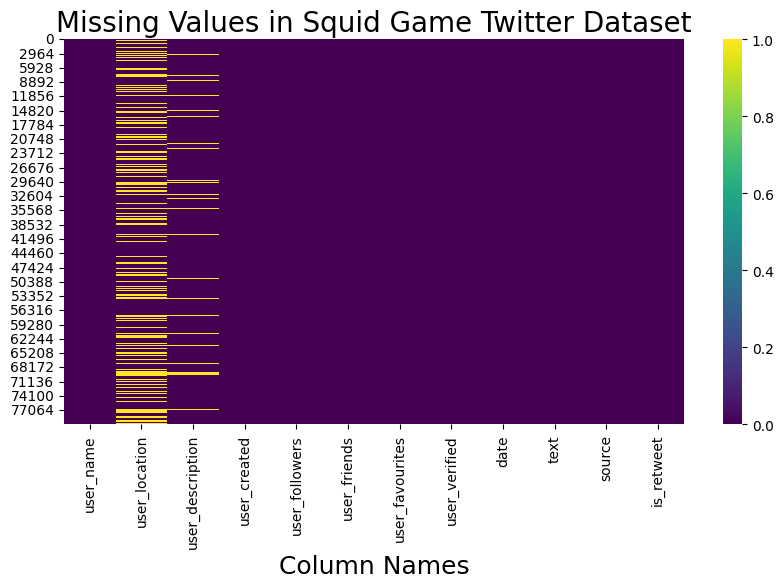

In [10]:
#Function to display a heatmap representation of missing values in the dataframe
def missing_values_heatmap(data):
  plt.figure(figsize=(10,5))
  sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
  plt.xlabel("Column Names", size=18)
  plt.title('Missing Values in Squid Game Twitter Dataset',fontsize=20)
  plt.show()

missing_values_heatmap(squidgame_data)

In [11]:
#Detecting the number of missing values in the dataframe
squidgame_data.isna().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [12]:
#Function to remove rows with missing values from dataframe
def remove_missing_values(data):
  cleaned_squidgame_data = data.dropna()
  return cleaned_squidgame_data

cleaned_squidgame_data = remove_missing_values(squidgame_data)

In [13]:
#Again, detecting the number of missing values in the dataframe after applying the function
cleaned_squidgame_data.isna().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
source              0
is_retweet          0
dtype: int64

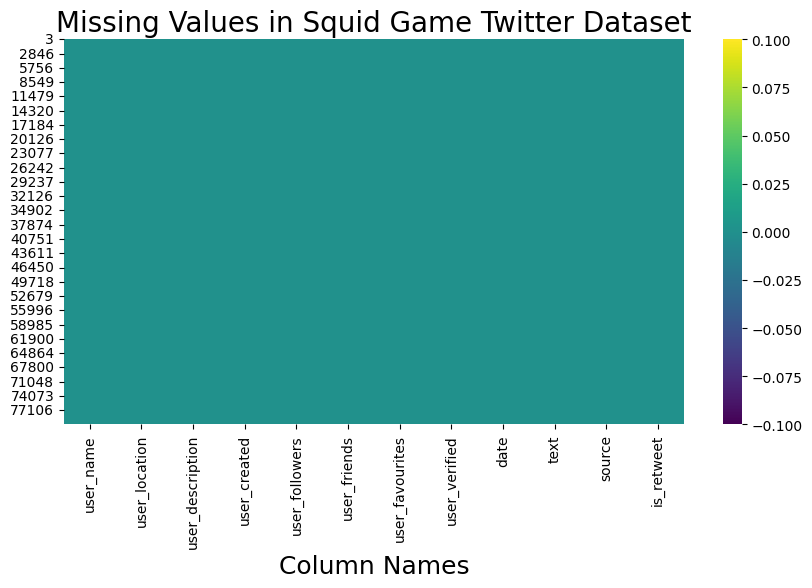

In [14]:
missing_values_heatmap(cleaned_squidgame_data)

### Pre-processing of user_location Column

In [15]:
#Function to print the number of unique values in a column, in this case the user_location column
def unique_locations(data, column):
  no_unique_locations = data[column].nunique()
  print (no_unique_locations)

unique_locations(cleaned_squidgame_data, "user_location")

17748


In [20]:
#A dictionary to store the key value pairs of user locations.
#Key -> value to keep.
#Value -> value to be replaced by corresponding key.
replacement_terms_dict = {
    "UK" : [ "london, UK", "London, UK", "UK, UK", "uk, uk",  "LDN", "london", "London", "UK", "England", "United Kingdom", "Manchester, UK"],
    "US" : ["Los Angeles, CA", "US", "United States", "USA", "Atlanta, GA", "California, USA", "New York", "California", "US, US", "Brooklyn",
            "Chicago", "washington", "US, NY", "Canada", "US, IL", "Washington, DC", "Calgary, US", "Toronto, Ontario", "Los Angeles",
            "San Francisco, CA", "Houston, TX", "Seattle, WA", "Florida, US"],
    "India" : ["Mumbai, India", "New Delhi, India"],
    "France" : ["Lyon, France"],
    "United Arab Emirates" : ["Dubai, United Arab Emirates"],
    "Nigeria" : ["Lagos, Nigeria"],
    "Unknown" : ["she/her", "Earth"]
}

In [21]:
#Function to replace to replace values using the replacement_terms_dict and regex
def replace_with_regex(df, col, pattern, replacement):
    df[col] = df[col].str.replace(pattern, replacement, regex=True)

In [22]:
#For loop to iterate through dictionary
for keep_value, remove_value in replacement_terms_dict.items():
  #Inner for loop to iterate through the lists within the dictionary
  for remove_value in remove_value :
    replace_with_regex(cleaned_squidgame_data, "user_location",  r'\b(?:' + remove_value + r')\b', keep_value) #Function call and compare 2 equal values
    replace_with_regex(cleaned_squidgame_data, "user_location", r'\b' + remove_value + r'\b', keep_value) #Function call and check if value exists within another value

In [23]:
unique_locations(cleaned_squidgame_data, "user_location")

17520


### Pre-processing of text Column

In [24]:
#Function to preprocess text
def text_preprocessing(text):
  stop_words = set(stopwords.words('english'))
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  #make text lowercase
  text = text.lower()

  #remove urls from text
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

  #remove text enlosed in square brackets
  text = re.sub('\[.*?\]', '', text)

  #remove text enlosed in angle brackets
  text = re.sub('<.*?>+', '', text)

  #remove punctuation characters from text
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

  #remove newline characters from text
  text = re.sub('\n', '', text)

  #remove substring of digit surrounded by word characters
  text = re.sub('\w*\d\w*', '', text)

  #remove stopwords from text
  text = " ".join([word for word in word_tokenize(text) if word not in stop_words and len(word)>3])

  #remove repeating characters in text
  text = re.sub(r'(.)\1+', r'\1', text)

  #remove emails in text
  text = re.sub('@[^\s]+', '', text)

  #remove numbers in text
  text = re.sub('[0-9]+', '', text)

  #stemming - create stem words for eeach word in text that has been tokenised
  text = " ".join([stemmer.stem(word) for word in word_tokenize(text)])

  #lemmatization - create lemma for eeach word in text that has been tokenised
  text = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

  return text

In [25]:
#Applying the function on the text column of the dataframe only
cleaned_squidgame_data['text'] = cleaned_squidgame_data['text'].apply(lambda x: text_preprocessing(x))

In [26]:
#Function to remove all emoji characters from the text
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F700-\U0001F77F"  # alchemical symbols
    u"\U0001F780-\U0001F7FF"  # geometric shapes extended
    u"\U0001F800-\U0001F8FF"  # supplemental arrows-C
    u"\U0001F900-\U0001F9FF"  # supplemental symbols & pictographs
    u"\U0001FA00-\U0001FA6F"  # chess symbols
    u"\U0001FA70-\U0001FAFF"  # symbols & pictographs extended-A
    u"\U00002702-\U000027B0"  # miscellaneous
    u"\U000024C2-\U0001F251"  # symbols
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [27]:
#Applying the function on the text column of the dataframe only
cleaned_squidgame_data['text'] = cleaned_squidgame_data['text'].apply(lambda x: remove_emoji(x))

In [29]:
print(cleaned_squidgame_data['text'].head(20))

3     blod slideim join squidgam thing alreadi dead ...
4     first game player kile mask guy blodi night th...
5     thgo explod marketcap sonth world first mobath...
7     plea vote daili pol thank think doni bek leav ...
9     discov english audio episod squid game korean ...
10                                 strugl real squidgam
11    squid game death foreshadow major spoiler blod...
14    saga continu data cheap honourworldng mesag tw...
15                               naur she pure squidgam
16    duno everyon go crazi squidgam could email imo...
18    squidgamein game everyon chain rope except mis...
19             dalgona candi lover newprofilep squidgam
21                  couldnt resist sketch loml squidgam
22    talk peopl love save mysteri caus light gren l...
25    wait there version squidgam watch show read su...
26                                 season xbox squidgam
27    reali thrile korea would told korean music wou...
28    let idol song ap premium trustedfast resp 

## Visualisations

### Word Cloud of text Column

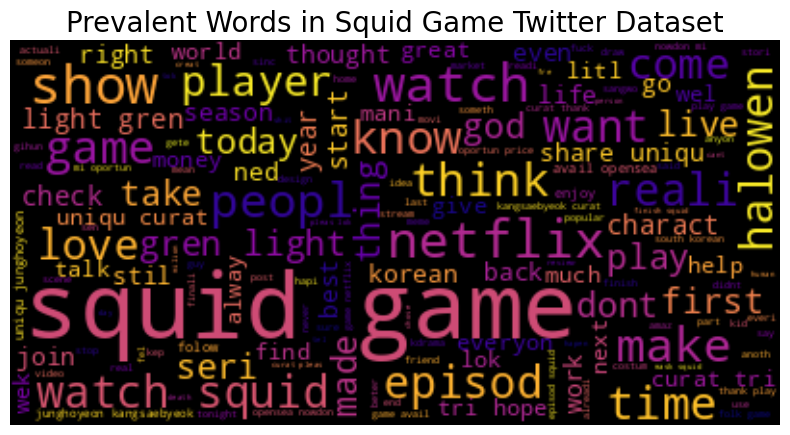

In [30]:
#Function to display a word cloud for the dataset
def word_cloud(data):
  text = ",".join(review for review in data.text if 'https' not in review and 'squidgame' not in review and 'SquidGame' not in review and 'squidgam' not in review)
  wordcloud = WordCloud(colormap='plasma').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.figure(1,figsize=(12, 12))
  plt.title('Prevalent Words in Squid Game Twitter Dataset',fontsize=20)
  plt.show()

word_cloud(cleaned_squidgame_data)

### 1. Which 10 locations had the most tweets containing the hashtag #squidgame?

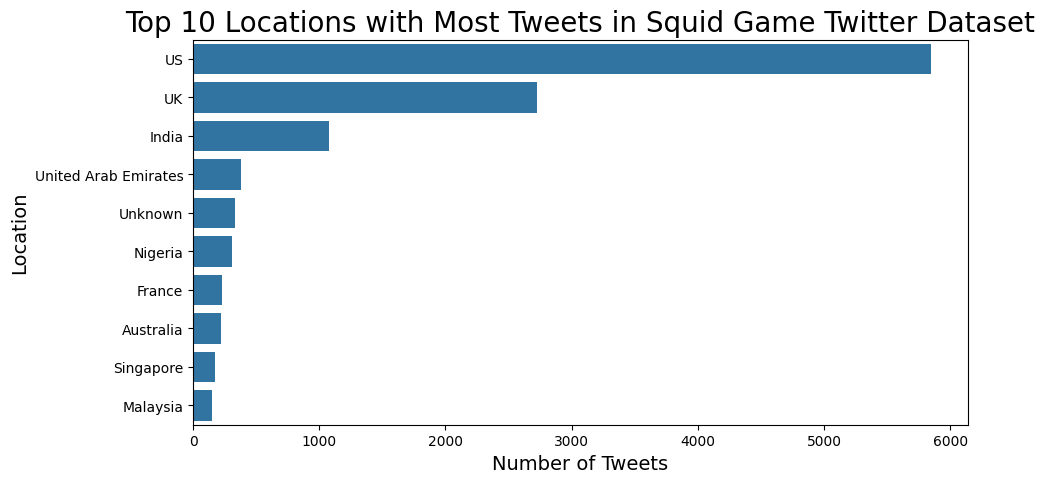

In [31]:
#Function to display a bar plot representation of the top 10 locations with the most tweets in the dataset
def top_ten_locations_barplot(data):
  plt.figure(figsize=(10,5))
  sns.barplot(x=data["user_location"].value_counts().values[0:10],
              y=data["user_location"].value_counts().index[0:10]);
  plt.title("Top 10 Locations with Most Tweets in Squid Game Twitter Dataset",fontsize=20)
  plt.xlabel("Number of Tweets",fontsize=14)
  plt.ylabel("Location",fontsize=14)
  plt.show()

top_ten_locations_barplot(cleaned_squidgame_data)

In [32]:
#Function to display heatmap representation of which locations have the most tweets in the dataset
def location_heatmap(data):
  top_locations = data["user_location"].value_counts().index[:100]

  geolocator = Nominatim(user_agent="tweet_map")
  coords = []

  for location in top_locations:
      try:
          location_info = geolocator.geocode(location)
          if location_info:
              coords.append([location_info.latitude, location_info.longitude])
      except Exception as e:
          print(f"Error geocoding {location}: {e}")

  df_coords = pd.DataFrame(coords, columns=['latitude', 'longitude'])
  tweet_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles='CartoDB positron')
  HeatMap(data=df_coords, radius=15).add_to(tweet_map)
  return tweet_map

location_heatmap(cleaned_squidgame_data)

Error geocoding Ontario, US: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Ontario%2C+US&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding Ohio, US: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Ohio%2C+US&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding Maryland, US: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Maryland%2C+US&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding Pennsylvania, US: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Pennsylvania%2C+US&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding Michigan, US: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Michigan%2C+US&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


### 2. For the top two locations with the most tweets containing the hashtag #squidgame, what are the most popular sources? How do they compare?

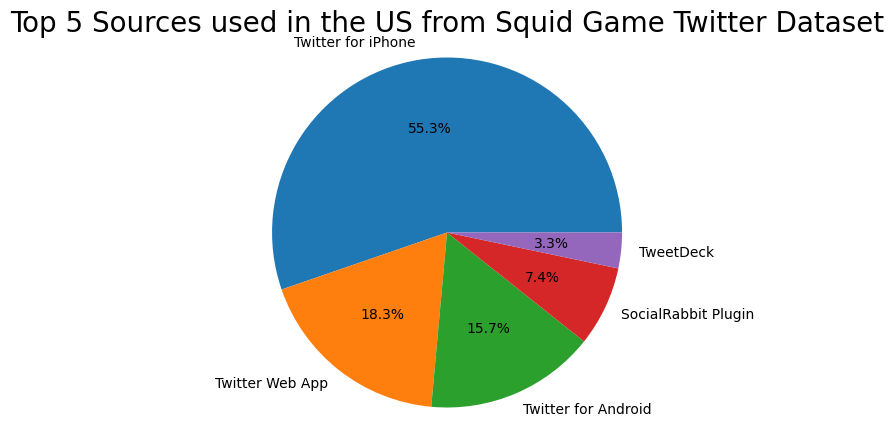

In [33]:
#Function to display a pie chart representation of the top 5 sources used in the most popular location (US) in the dataset
def us_sources_piechart(data):
  us_tweets = data[data['user_location'] == 'US']
  us_sources = us_tweets['source']

  source_count = us_sources.value_counts()
  top_5_us_sources = source_count.head(5)

  plt.figure(figsize=(10,5))
  plt.pie(top_5_us_sources, autopct='%1.1f%%', labels=top_5_us_sources.index)
  plt.title("Top 5 Sources used in the US from Squid Game Twitter Dataset",fontsize=20)
  plt.axis('equal')
  plt.show()

us_sources_piechart(cleaned_squidgame_data)

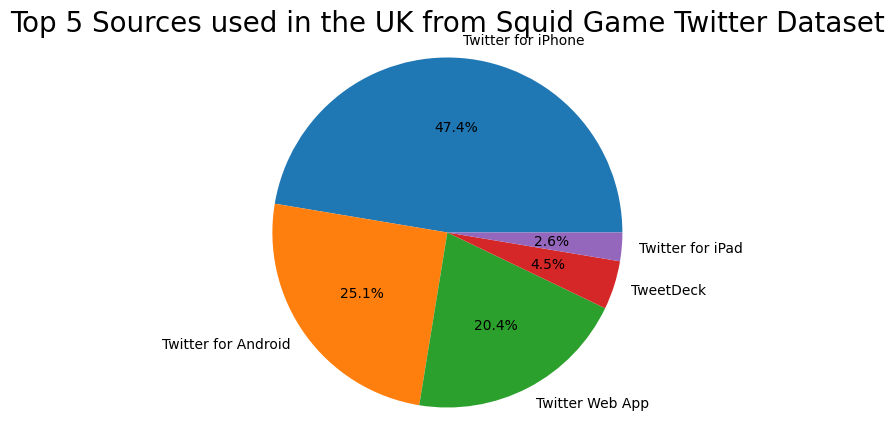

In [34]:
#Function to display a pie chart representation of the top 5 sources used in the second most popular location (UK) in the dataset
def uk_sources_piechart(data):
  uk_tweets = data[data['user_location'] == 'UK']
  uk_sources = uk_tweets['source']

  source_count = uk_sources.value_counts()
  top_5_uk_sources = source_count.head(5)

  plt.figure(figsize=(10,5))
  plt.pie(top_5_uk_sources, autopct='%1.1f%%', labels=top_5_uk_sources.index)
  plt.title("Top 5 Sources used in the UK from Squid Game Twitter Dataset",fontsize=20)
  plt.axis('equal')
  plt.show()

uk_sources_piechart(cleaned_squidgame_data)

### 3. Are users of hashtag #squidgame, verified or unverified users?

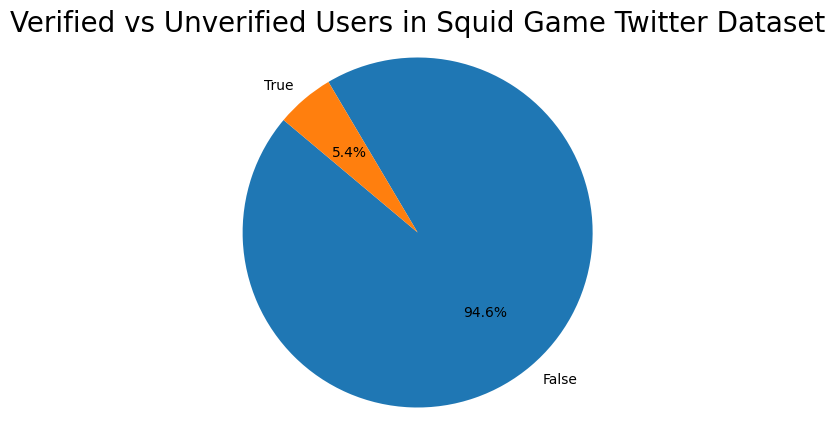

In [35]:
#Function to display a pie chart representation of verified vs unverified users in the dataset
def user_verified_piechart(data):
  user_verified_counts = data['user_verified'].value_counts()
  plt.figure(figsize=(10,5))
  plt.pie(user_verified_counts, labels=user_verified_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title("Verified vs Unverified Users in Squid Game Twitter Dataset",fontsize=20)
  plt.axis('equal')
  plt.show()

user_verified_piechart(cleaned_squidgame_data)

### 4. Who are the top 5 users of the hashtag #squidgame?

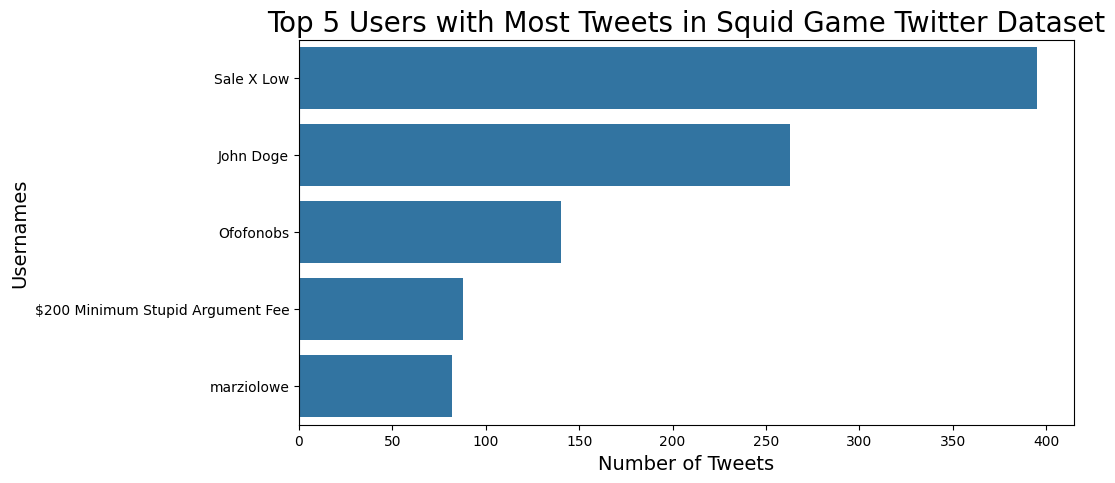

In [36]:
#Function to display a bar plot representation of the top 5 users with the most tweets in the dataset
def top_5_users_barplot(data):
  plt.figure(figsize=(10,5))
  sns.barplot(x=data["user_name"].value_counts().values[0:5],
              y=data["user_name"].value_counts().index[0:5]);
  plt.title("Top 5 Users with Most Tweets in Squid Game Twitter Dataset",fontsize=20)
  plt.xlabel("Number of Tweets",fontsize=14)
  plt.ylabel("Usernames",fontsize=14)
  plt.show()

top_5_users_barplot(cleaned_squidgame_data)

### 5. What is the distribution of the number of characters in the tweets containing the hashtag #squidgame?

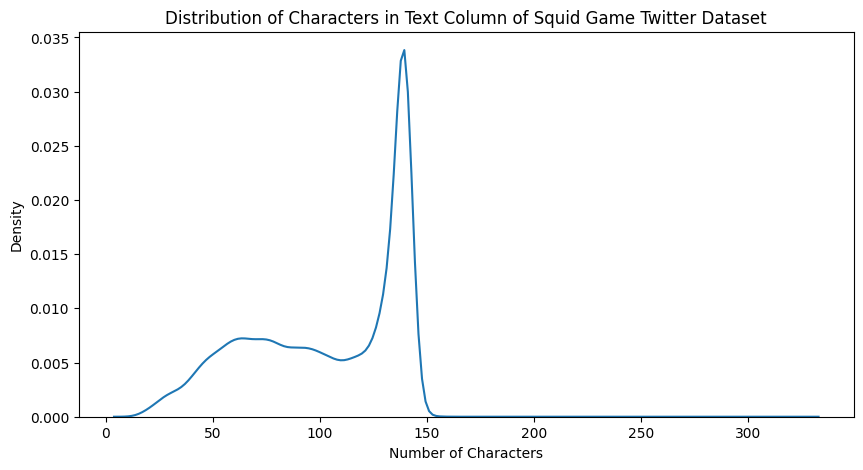

In [37]:
#Function to display kernel density estimate (KDE) representation of distribution of characters in the text column of dataset BEFORE text pre-processing
def text_kde(data):
  data["num of characters in text"] = data["text"].apply(lambda x: len(x))
  plt.figure(figsize=(10,5))
  sns.kdeplot(data["num of characters in text"])
  plt.title("Distribution of Characters in Text Column of Squid Game Twitter Dataset")
  plt.xlabel("Number of Characters")
  plt.show()

text_kde(squidgame_data)

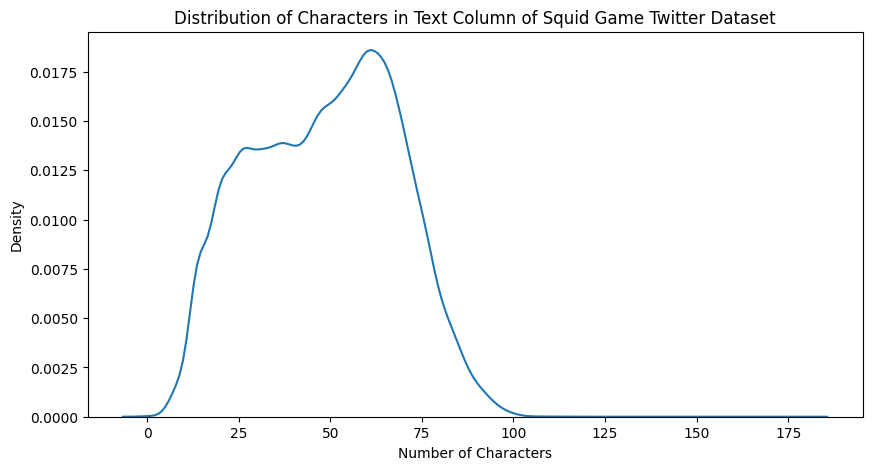

In [38]:
#Using the text_kde function to display KDE representation of distribution of characters in the text column of dataset AFTER text pre-processing
text_kde(cleaned_squidgame_data)

# Part A: Statistical Analysis - Section 2: Graph Analysis

In [39]:
#Read in GML file of Power graph dataset
power_data = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/CMP7202 Web Social Media Analytics and Visualisation/Assessment/power.gml", label='id')

In [40]:
#Function to print number of nodes and edges within a graph
def nodes_and_edges(graph):
  n = graph.number_of_nodes()
  m = graph.number_of_edges()
  print("This graph has {n} nodes and {m} edges.".format(n=n, m=m))

nodes_and_edges(power_data)

This graph has 4941 nodes and 6594 edges.


## Centrality Measures
Finding the most important nodes in the network based on different centrality measures.
All other tasks related to this section have been completed in Gephi.

In [41]:
#Function to return degree centrality for each node in the graph
def degree_centrality(graph):
  degree_centrality_values = nx.centrality.degree_centrality(graph)
  return degree_centrality_values

degree_centrality_values = degree_centrality(power_data)

In [42]:
#Function to return 10 nodes with the highest degree centralities in the graph
def top_ten_degree_centrality(graph):
  degree_centrality_values = nx.centrality.degree_centrality(graph)
  return (sorted(degree_centrality_values.items(), key=lambda item: item[1], reverse=True))[:10]

top_ten_degree_centrality(power_data)

[(2553, 0.003846153846153846),
 (4458, 0.0036437246963562753),
 (831, 0.0028340080971659917),
 (3468, 0.0028340080971659917),
 (4345, 0.0028340080971659917),
 (2382, 0.002631578947368421),
 (2542, 0.002631578947368421),
 (2575, 0.002631578947368421),
 (2585, 0.002631578947368421),
 (3895, 0.002631578947368421)]

In [43]:
#Function to return betweenness centrality for each node in the graph
def betweenness_centrality(graph):
  betweenness_centrality_values = nx.centrality.betweenness_centrality(graph)
  return betweenness_centrality_values

betweenness_centrality_values = betweenness_centrality(power_data)

In [44]:
#Function to return 10 nodes with the highest betweenness centralities in the graph
def top_ten_betweenness_centrality(graph):
  betweenness_centrality_values = nx.centrality.betweenness_centrality(graph)
  return (sorted(betweenness_centrality_values.items(), key=lambda item: item[1], reverse=True))[:10]

top_ten_betweenness_centrality(power_data)

[(4164, 0.28841562147939626),
 (2543, 0.281698123316245),
 (1243, 0.2796951897344535),
 (4219, 0.27764988777849753),
 (2528, 0.2673044750046778),
 (1267, 0.24827101665302148),
 (1308, 0.23651669104994388),
 (1244, 0.20523301004236533),
 (426, 0.20495396256691495),
 (2606, 0.20311626353593557)]

In [45]:
#Function to return closeness centrality for each node in the graph
def closeness_centrality(graph):
  closeness_centrality_values = nx.centrality.closeness_centrality(graph)
  return closeness_centrality_values

closeness_centrality_values = closeness_centrality(power_data)

In [46]:
#Function to return 10 nodes with the highest closeness centralities in the graph
def top_ten_closeness_centrality(graph):
  closeness_centrality_values = nx.centrality.closeness_centrality(graph)
  return (sorted(closeness_centrality_values.items(), key=lambda item: item[1], reverse=True))[:10]

top_ten_closeness_centrality(power_data)

[(1308, 0.08182330142114155),
 (2594, 0.0809437981320662),
 (2605, 0.08035786905246035),
 (1131, 0.07987194619153098),
 (2606, 0.0796260477111541),
 (1243, 0.07932684587468285),
 (1476, 0.07918570169111165),
 (2557, 0.07911468426194328),
 (2528, 0.07877280265339967),
 (2532, 0.07803121248499399)]

In [47]:
#Function to return eigenvector centrality for each node in the graph
def eigenvector_centrality(graph):
  eigenvector_centrality_values = nx.centrality.eigenvector_centrality(graph)
  return eigenvector_centrality_values

eigenvector_centrality_values = eigenvector_centrality(power_data)

In [48]:
#Function to return 10 nodes with the highest eigenvector centralities in the graph
def top_ten_eigenvector_centrality(graph):
  eigenvector_centrality_values = nx.centrality.eigenvector_centrality(graph)
  return (sorted(eigenvector_centrality_values.items(), key=lambda item: item[1], reverse=True))[:10]

top_ten_eigenvector_centrality(power_data)

[(4381, 0.2865344997425941),
 (4345, 0.2745147084801142),
 (4336, 0.24822112815712555),
 (4332, 0.24290464678318427),
 (4352, 0.23627243283037444),
 (4384, 0.22130755705306204),
 (4402, 0.21475711039708476),
 (4347, 0.2141116852051302),
 (4395, 0.1978298988369615),
 (4373, 0.19478919801440525)]

In [49]:
#Function to return density of a graph
def graph_density(graph):
  graph_density = nx.density(graph)
  return graph_density

graph_density(power_data)

0.0005403026973346214

In [50]:
#Function to return the average length of the shortest path within a graph
def avg_shortest_path(graph):
  avg_shortest_path_length = nx.average_shortest_path_length(graph)
  return avg_shortest_path_length

avg_shortest_path(power_data)

18.989185424445708

In [51]:
#Function to return diameter of a graph
def graph_diameter(graph):
  graph_diameter = nx.diameter(graph)
  return graph_diameter

graph_diameter(power_data)

46

# Part B: Text Mining - Section 1: Sentiment Analysis

In [52]:
#Using the cleaned text from the dataset in Part A Section 1 for sentiment analysis
cleaned_squidgame_data_text=cleaned_squidgame_data['text']
cleaned_squidgame_data_text.head(20)

3     blod slideim join squidgam thing alreadi dead ...
4     first game player kile mask guy blodi night th...
5     thgo explod marketcap sonth world first mobath...
7     plea vote daili pol thank think doni bek leav ...
9     discov english audio episod squid game korean ...
10                                 strugl real squidgam
11    squid game death foreshadow major spoiler blod...
14    saga continu data cheap honourworldng mesag tw...
15                               naur she pure squidgam
16    duno everyon go crazi squidgam could email imo...
18    squidgamein game everyon chain rope except mis...
19             dalgona candi lover newprofilep squidgam
21                  couldnt resist sketch loml squidgam
22    talk peopl love save mysteri caus light gren l...
25    wait there version squidgam watch show read su...
26                                 season xbox squidgam
27    reali thrile korea would told korean music wou...
28    let idol song ap premium trustedfast resp 

## Lexicon-Based Approach

In [53]:
#Function to check the sentiment, subjectivity and polarity of the data
def sentiment_checker (data):
    sentiment_df = pd.DataFrame(columns=['text','subjectivity','polarity', 'sentiment'])
    sentiment_labels = []
    for i in data:
        blob = TextBlob(i)
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity

        if pol > 0 : #If polarity of data is greater than 0, then sentiment = positive
            sent = "positive"
        elif pol < 0: #Else, if polarity of data is less than 0, then sentiment = negative
            sent = "negative"
        else: #Else, polarity equals 0, then sentiment = neutral
            sent = "neutral"

        row = [i, sub, pol, sent]
        sentiment_df.loc[len(sentiment_df)] = row

        sentiment_labels.append(sent)
    return sentiment_df

In [54]:
sentiment_df = sentiment_checker(cleaned_squidgame_data_text)

In [55]:
#Function to plot a jointplot for subjectivity and polarity of the data
def joint_plotter(sentiment_df):
    sns.jointplot(data=sentiment_df, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()

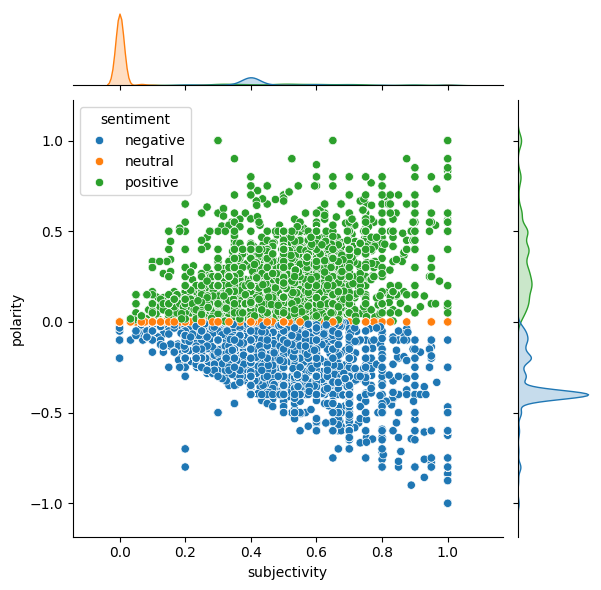

In [56]:
joint_plotter(sentiment_df)

In [57]:
#Function to plot a barplot for the count of each sentiment in the dataset
def sentiment_counts(data):
    sentiment_counts = pd.DataFrame(sentiment_df["sentiment"].value_counts())
    sentiment_counts = sentiment_counts.rename({'sentiment': 'count'}, axis=1)
    sentiment_counts["sentiment"] = sentiment_counts.index
    sns.barplot(data= sentiment_counts, x="sentiment", y = "count")
    plt.show()

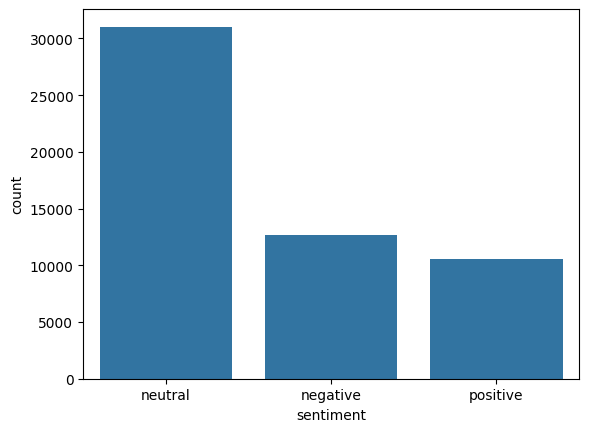

In [58]:
sentiment_counts(sentiment_df)

In [59]:
#Function to plot frequency distribution of 30 most common words in each subset of data
def frequency_distribution(subset):
    fdist = nltk.FreqDist()
    for i in subset["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j] +=1
    fdist.plot(30, cumulative=False)
    return fdist

In [60]:
#Function to display a word cloud for the data
def fdist_word_cloud(fdist, title):
  wordcloud = WordCloud(colormap='plasma').generate_from_frequencies(fdist)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(title,fontsize=20)
  plt.show()

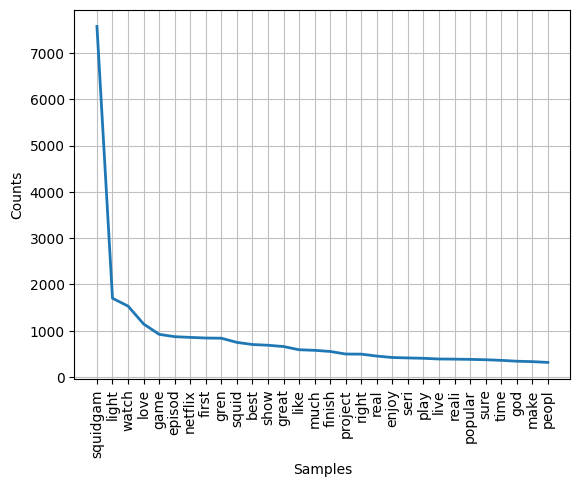

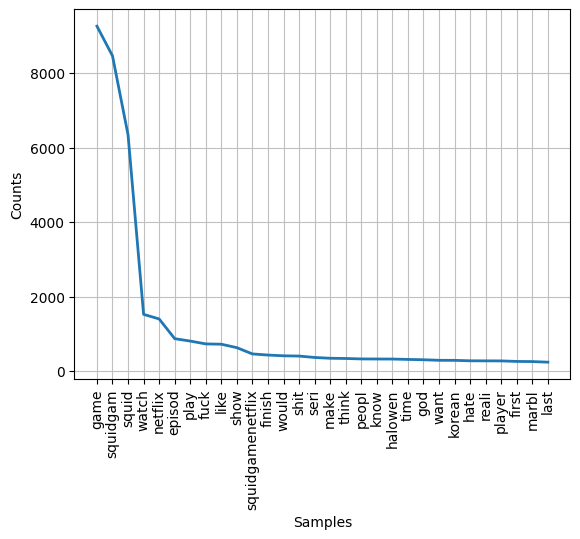

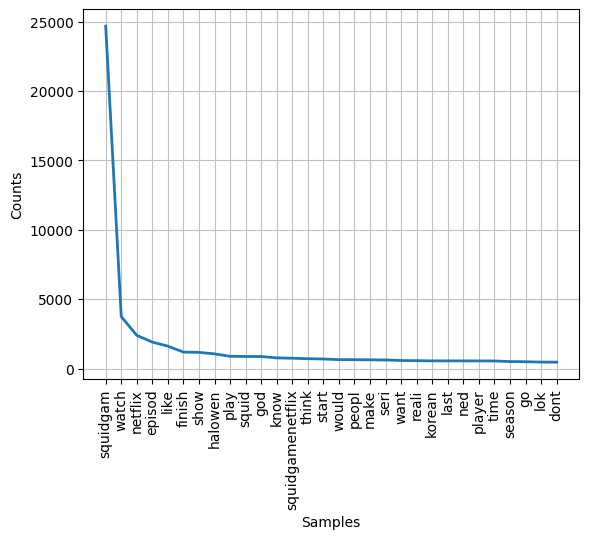

In [61]:
#Calling the frequency_distribution function for each subset of data
positive_subset = frequency_distribution(sentiment_df[sentiment_df["sentiment"] == "positive"])
negative_subset = frequency_distribution(sentiment_df[sentiment_df["sentiment"] == "negative"])
neutral_subset = frequency_distribution(sentiment_df[sentiment_df["sentiment"] == "neutral"])

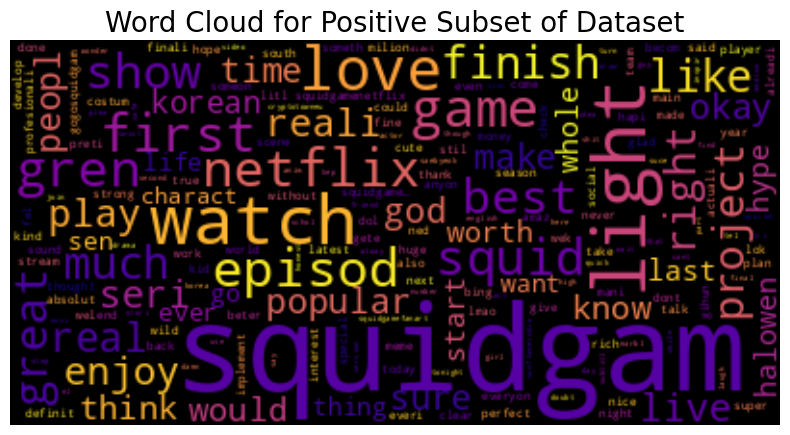

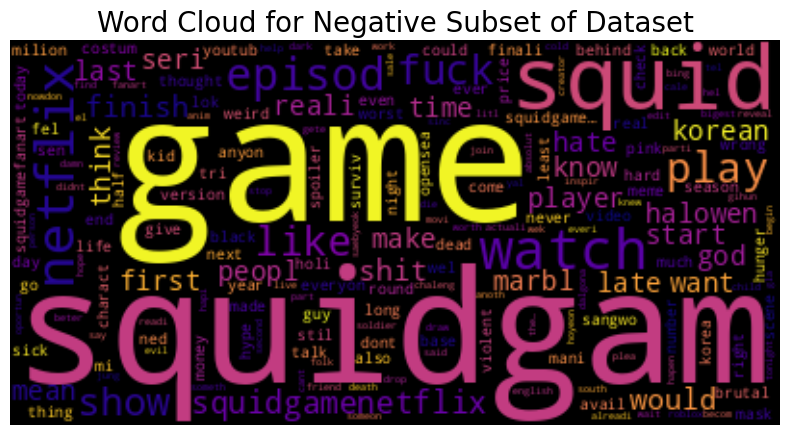

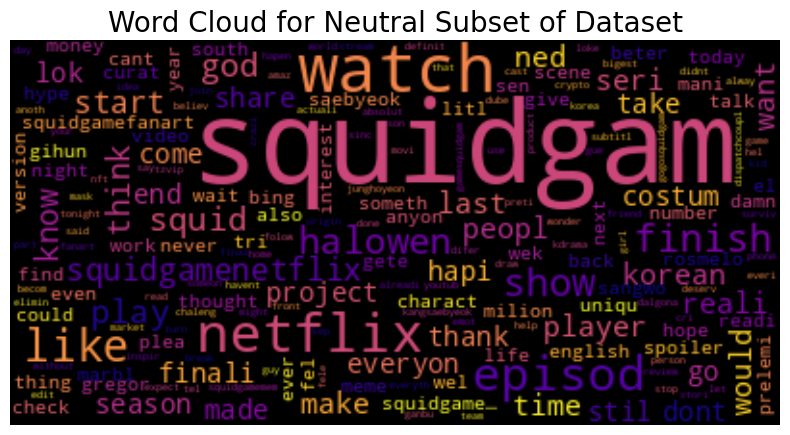

In [62]:
#Calling the fdist_word_cloud function for each subset of data
fdist_word_cloud(positive_subset, "Word Cloud for Positive Subset of Dataset")
fdist_word_cloud(negative_subset, "Word Cloud for Negative Subset of Dataset")
fdist_word_cloud(neutral_subset, "Word Cloud for Neutral Subset of Dataset")

## Machine Learning Approach - Decision Tree Classifier for Multi-Class Classification

In [63]:
#Creating a copy of the sentiment_df to be used for multi-class classification
multiclass_sentiment_df = sentiment_df.copy(deep=True)

<Axes: xlabel='sentiment', ylabel='count'>

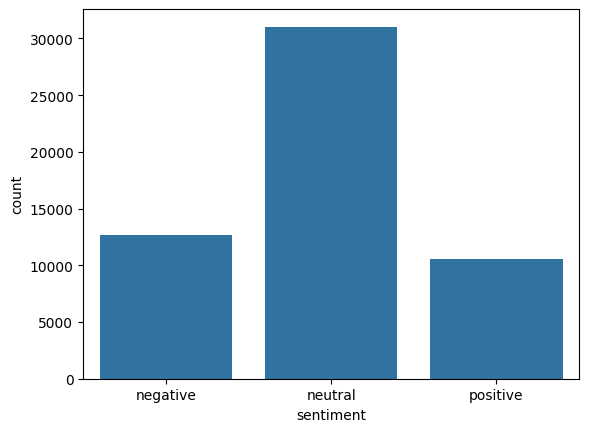

In [64]:
sns.countplot(multiclass_sentiment_df, x="sentiment")

### Data Pre-processing

#### Label Encoding

In [65]:
#Function to perform label encoding on the data
def label_encoding(data):
  label_encoder = LabelEncoder()
  data = label_encoder.fit_transform(data)
  print("Original Category -> Encoded Value:")
  for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category} -> {encoded_value}")
  return data

In [66]:
#Calling the label_encoding function on the 'sentiment' column of the dataframe
multiclass_sentiment_df['sentiment'] = label_encoding(multiclass_sentiment_df['sentiment'])

Original Category -> Encoded Value:
negative -> 0
neutral -> 1
positive -> 2


In [67]:
multiclass_sentiment_df.head(10)

,text,subjectivity,polarity,sentiment
0,blod slideim join squidgam thing alreadi dead ...,0.400000,-0.200000,0
1,first game player kile mask guy blodi night th...,0.283333,-0.137500,0
2,thgo explod marketcap sonth world first mobath...,0.366667,-0.075000,0
3,plea vote daili pol thank think doni bek leav ...,0.000000,0.000000,1
4,discov english audio episod squid game korean ...,0.175000,-0.175000,0
5,strugl real squidgam,0.300000,0.200000,2
6,squid game death foreshadow major spoiler blod...,0.450000,-0.168750,0
7,saga continu data cheap honourworldng mesag tw...,0.700000,0.400000,2
8,naur she pure squidgam,0.500000,0.214286,2
9,duno everyon go crazi squidgam could email imo...,0.000000,0.000000,1


### TF-IDF

In [68]:
#Function to transform data to numerical vectors using TF-IDF
def tfidf(dataframe):
  lb = LabelEncoder()
  tfidf_vectorizer = TfidfVectorizer()

  dataframe.sentiment = lb.fit_transform(dataframe.sentiment) #Transform to fit ML model

  X = tfidf_vectorizer.fit_transform(dataframe.text)
  y = dataframe.iloc[:,-1].values
  return X, y

In [69]:
X, y = tfidf(multiclass_sentiment_df)

### Data Splitting

In [70]:
#Function to split the dataframe using the 70:30 Train Test Split
def data_split(X, y, data):
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data)
  return train_X, test_X, train_y, test_y

In [71]:
train_X, test_X, train_y, test_y = data_split(X, y, multiclass_sentiment_df.sentiment)

### Model Training and Testing (Decision Tree Classifier)

In [72]:
#Function to train and test (fit and predict) a decision tree classifier model
def decision_tree_model(train_X, train_y, test_X):
  clf = tree.DecisionTreeClassifier()
  decision_tree_clf = clf.fit(train_X, train_y) #Training model
  predict = clf.predict(test_X) #Testing model
  return predict

In [73]:
predict = decision_tree_model(train_X, train_y, test_X)

### Model Evaluation

In [74]:
#Function to calculate metrics of model testing, including classification report and confusion matrix
def model_evaluation(predict, test_y):
  print("Classification Report:")
  print(classification_report(predict, test_y))

  print('\n')
  print("Confusion Matrix:")
  CR=confusion_matrix(test_y, predict)
  print(CR)

  fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 5), show_absolute=True, show_normed=True, colorbar=True)
  plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3794
           1       0.99      0.99      0.99      9301
           2       0.96      0.95      0.96      3186

    accuracy                           0.98     16281
   macro avg       0.97      0.97      0.97     16281
weighted avg       0.98      0.98      0.98     16281



Confusion Matrix:
[[3676   35  101]
 [  42 9226   43]
 [  76   40 3042]]


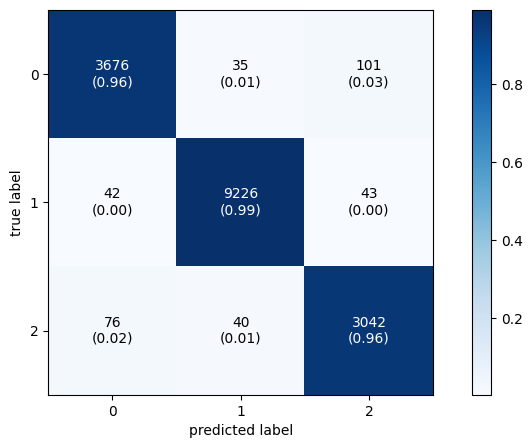

In [75]:
model_evaluation(predict, test_y)

## Machine Learning Approach - Decision Tree Classifier for Binary Classification

In [76]:
#Using the sentiment_df for binary classification
binaryclass_sentiment_df = sentiment_df

### Data Pre-processing

#### Label Encoding

In [77]:
binaryclass_sentiment_df.head()

,text,subjectivity,polarity,sentiment
0,blod slideim join squidgam thing alreadi dead ...,0.400000,-0.2000,negative
1,first game player kile mask guy blodi night th...,0.283333,-0.1375,negative
2,thgo explod marketcap sonth world first mobath...,0.366667,-0.0750,negative
3,plea vote daili pol thank think doni bek leav ...,0.000000,0.0000,neutral
4,discov english audio episod squid game korean ...,0.175000,-0.1750,negative


In [78]:
#Calling the label_encoding function on the 'sentiment' column of the dataframe
binaryclass_sentiment_df['sentiment'] = label_encoding(binaryclass_sentiment_df['sentiment'])

Original Category -> Encoded Value:
negative -> 0
neutral -> 1
positive -> 2


In [79]:
#Function to extract and concatenate the negative and positive data from the dataframe to eliminate 'neutral' data
def extract_and_concat(binaryclass_sentiment_df):
  negative_data = binaryclass_sentiment_df[binaryclass_sentiment_df['sentiment'] == 0]
  positive_data = binaryclass_sentiment_df[binaryclass_sentiment_df['sentiment'] == 2]
  binaryclass_sentiment_df = pd.concat([negative_data, positive_data])
  return binaryclass_sentiment_df

In [80]:
binaryclass_sentiment_df = extract_and_concat(binaryclass_sentiment_df)

In [81]:
binaryclass_sentiment_df

,text,subjectivity,polarity,sentiment
0,blod slideim join squidgam thing alreadi dead ...,0.400000,-0.20000,0
1,first game player kile mask guy blodi night th...,0.283333,-0.13750,0
2,thgo explod marketcap sonth world first mobath...,0.366667,-0.07500,0
4,discov english audio episod squid game korean ...,0.175000,-0.17500,0
6,squid game death foreshadow major spoiler blod...,0.450000,-0.16875,0
...,...,...,...,...
54214,true stori niemeconseil notoriété squidgam rab...,0.650000,0.35000,2
54218,netflix runaway seri squidgam show real proble...,0.300000,0.20000,2
54226,popular halowen costum year wrong answer onlys...,0.900000,0.05000,2
54229,know charact best person cant away mind squidg...,0.300000,1.00000,2


### TF-IDF

In [82]:
X, y = tfidf(binaryclass_sentiment_df)

### Data Splitting

In [83]:
train_X, test_X, train_y, test_y = data_split(X, y, binaryclass_sentiment_df.sentiment)

### Model Training and Testing (Decision Tree Classifier)

In [84]:
predict = decision_tree_model(train_X, train_y, test_X)

### Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3879
           1       0.95      0.97      0.96      3091

    accuracy                           0.96      6970
   macro avg       0.96      0.97      0.96      6970
weighted avg       0.96      0.96      0.96      6970



Confusion Matrix:
[[3722   90]
 [ 157 3001]]


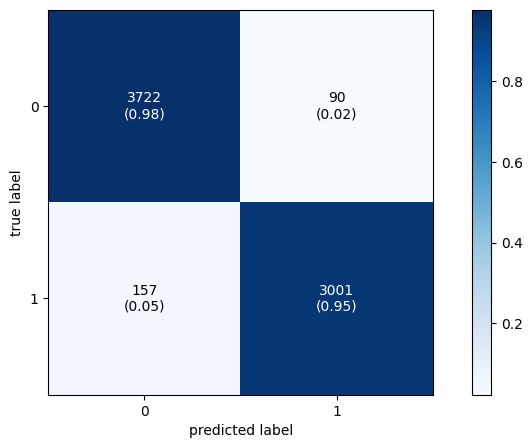

In [85]:
model_evaluation(predict, test_y)

## Neural Network for Sentiment Analysis

In [86]:
#Function to separate the X and Y
def separating_inputs(data):
  X = data.text
  y = data.sentiment
  return X, y

In [87]:
X, y = separating_inputs(binaryclass_sentiment_df)

In [88]:
X = binaryclass_sentiment_df.text
y = binaryclass_sentiment_df.sentiment

In [89]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

### Data Splitting

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

### Data Pre-processing

In [91]:
#Data type conversion - TensorFlow expects float32 or float64
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

### Model Training and Testing

In [92]:
#Function to create a layered neural network model using tensorflow
def tensorflow_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer) #single output to classify as positive or negative
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [93]:
#Function to train and test tensflow model
def train_and_test(X_train, Y_train, X_test, Y_test):
  model = tensorflow_model()
  model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)
  print('Model Training Complete')
  model_test = model.evaluate(X_test,Y_test) #Model Testing
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5) #If greater than 0.5 then, = positive
  return history

In [94]:
model = tensorflow_model()

In [95]:
history = train_and_test(X_train, Y_train, X_test, Y_test)

Epoch 1/6
183/183 [==============================] - 88s 460ms/step - loss: 0.3201 - accuracy: 0.8507 - val_loss: 0.1288 - val_accuracy: 0.9564
Epoch 2/6
183/183 [==============================] - 84s 457ms/step - loss: 0.0795 - accuracy: 0.9753 - val_loss: 0.0904 - val_accuracy: 0.9748
Epoch 3/6
183/183 [==============================] - 86s 470ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0804 - val_accuracy: 0.9723
Epoch 4/6
183/183 [==============================] - 82s 448ms/step - loss: 0.0603 - accuracy: 0.9838 - val_loss: 0.0818 - val_accuracy: 0.9730
Epoch 5/6
183/183 [==============================] - 85s 462ms/step - loss: 0.0395 - accuracy: 0.9885 - val_loss: 0.0766 - val_accuracy: 0.9748
Epoch 6/6
183/183 [==============================] - 85s 466ms/step - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.0777 - val_accuracy: 0.9742
Model Training Complete
218/218 [==============================] - 18s 81ms/step


### Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3879
           1       0.95      0.97      0.96      3091

    accuracy                           0.96      6970
   macro avg       0.96      0.97      0.96      6970
weighted avg       0.96      0.96      0.96      6970



Confusion Matrix:
[[3722   90]
 [ 157 3001]]


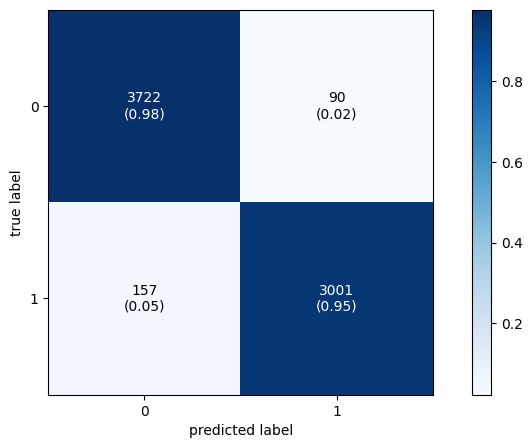

In [96]:
model_evaluation(predict, test_y)

In [97]:
#Function to plot model loss
def model_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

#Function to plot model accuracy
def model_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

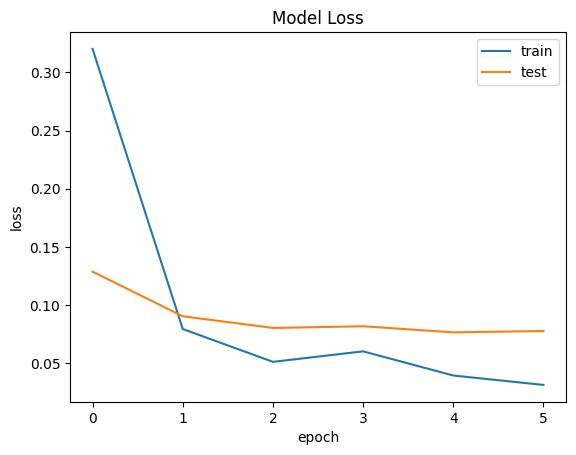

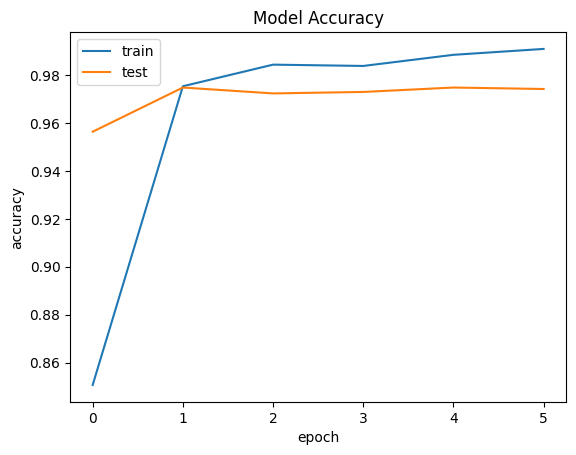

In [98]:
model_loss(history)
model_accuracy(history)

# Part B: Text Mining - Section 2: Topic Modelling

In [99]:
#Function to store values in a text file
def save_to_text_file(filename, content):
  with open(filename, 'w', encoding='utf-8') as file:
    file.write(content)

In [100]:
#Function to retrieve articles using News API
def get_articles(query, secret, url, output_file='articles.txt'):
  parameters = {
      'q': query,
      'pageSize': 50,
      'apiKey': secret
  }

  response = requests.get(url, params=parameters)
  response_json = response.json()

  data = []
  all_articles_content = ''

  for i in response_json['articles']:
    time.sleep(10)
    article_data = {
        'Title': i["title"],
        'Authors': None,
        'Publication Date': i["publishedAt"],
        'Summary': None,
        'URL': i['url'],
        'Content': None,
        'Top Image': None,
        'Keywords/Tags': None,
        'Sentiment': None
    }

    article = Article(article_data['URL'])
    article.download()
    article.parse()
    article.nlp()

    article_data['Authors'] = article.authors
    article_data['Summary'] = article.summary
    article_data['Content'] = article.text
    article_data['Top Image'] = article.top_image
    article_data['Keywords/Tags'] = article.keywords

    #Performing sentiment analysis using TextBlob
    analyse = TextBlob(article.text)
    article_data['Sentiment'] = analyse.sentiment

    data.append(article_data)
    all_articles_content += article.text + '\n\n'

  save_to_text_file(output_file, all_articles_content)
  return data

In [101]:
query = 'squidgame'
api_key = '1e78b2d303f44850ba269c4d8f4b9a66'
api_url = 'https://newsapi.org/v2/everything?'

articles_data = get_articles(query, api_key, api_url)

for article_data in articles_data:
  print("\nArticle:")
  for key, value in article_data.items():
    print(f"{key}: {value}")


Article:
Title: Netflix Reveals Shows Returning in 2024
Authors: []
Publication Date: 2024-04-22T20:10:06Z
Summary: “I'm not afraid of him.
I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.
URL: https://biztoc.com/x/dc86c823feea720d
Content: “I'm not afraid of him. I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.

Ticker
Top Image: https://c.biztoc.com/274/og.png
Keywords/Tags: ['david', 'tkachukticker', 'pastrnak', 'biztoc', 'afraid', 'guys', 'matthew', 'punch', 'bout', 'id', 'im']
Sentiment: Sentiment(polarity=0.3, subjectivity=0.9)

Article:
Title: Netflix Shows Returning Late 2024
Authors: []
Publication Date: 2024-04-23T12:16:05Z
Summary: “I'm not afraid of him.
I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.
URL: https://biztoc.com/x/470aefadc70bd54c
Content: “I'm not afraid of him. I can take

## Text Pre-processing

In [102]:
articles = open('/content/articles.txt', 'r').read()
print(articles)

“I'm not afraid of him. I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.

Ticker

“I'm not afraid of him. I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.

Ticker

“Physical: 100” is a Korean competition reality survival show available on Netflix. The show pits 100 competitors with different physiques and training styles against each other in an elimination-style competition. Multiple comparisons have been made to “Squid Game,” another show that delivered enormous value to Netflix.

An analysis using Parrot Analytics’ content valuation…

This story appeared on thewrap.com , .

“I'm not afraid of him. I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.

Ticker

“I'm not afraid of him. I can take a punch and I'd do anything for these guys here.” - David Pastrnak on his bout with Matthew Tkachuk.

Ticker



In [103]:
articles_df=pd.DataFrame(articles_data)

In [104]:
articles_content = articles_df['Content']

In [105]:
articles_content
articles_content.head()

0    “I'm not afraid of him. I can take a punch and...
1    “I'm not afraid of him. I can take a punch and...
2    “Physical: 100” is a Korean competition realit...
3    “I'm not afraid of him. I can take a punch and...
4    “I'm not afraid of him. I can take a punch and...
Name: Content, dtype: object

In [106]:
#Applying text_preprocessing on articles_content dataframe to preprocess text
articles_content = articles_content.apply(text_preprocessing)

In [107]:
articles_content.head()

0    afraid take punch anyth guy david pastrnak bou...
1    afraid take punch anyth guy david pastrnak bou...
2    physic korean competit realiti surviv show ava...
3    afraid take punch anyth guy david pastrnak bou...
4    afraid take punch anyth guy david pastrnak bou...
Name: Content, dtype: object

## Descriptive Analysis

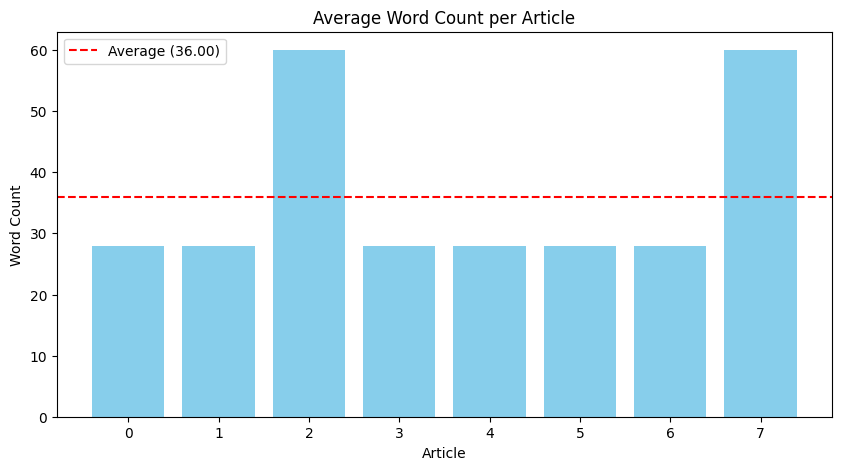

Overall Average Word Count: 36.0


In [152]:
#Function to calculate average word count for all articles and plot word count for each
def doc_wordcounts(articles_df):
  articles_df['word_count'] = articles_df['Content'].apply(lambda x: len(x.split()))
  average_word_count_per_document = articles_df['word_count'].mean()

  plt.figure(figsize=(10, 5))
  plt.bar(range(len(articles_df)), articles_df['word_count'], color='skyblue')
  plt.xlabel('Article')
  plt.ylabel('Word Count')
  plt.title('Average Word Count per Article')
  plt.axhline(average_word_count_per_document, color='red', linestyle='--', label=f'Average ({average_word_count_per_document:.2f})')
  plt.legend()
  plt.show()

  overall_average_word_count = articles_df['word_count'].mean()
  print("Overall Average Word Count:", overall_average_word_count)

doc_wordcounts(articles_df)

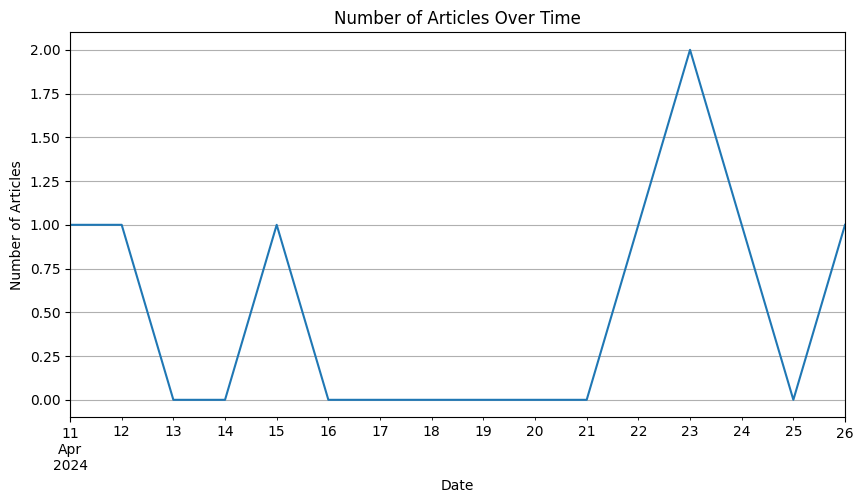

In [109]:
def datetime_distribution(articles_df):
  articles_df['Publication Date'] = pd.to_datetime(articles_df['Publication Date'])

  articles_df.set_index('Publication Date', inplace=True)
  articles_count_per_day = articles_df.resample('D').size()

  plt.figure(figsize=(10, 5))
  articles_count_per_day.plot()
  plt.title('Number of Articles Over Time')
  plt.xlabel('Date')
  plt.ylabel('Number of Articles')
  plt.grid(True)
  plt.show()

datetime_distribution(articles_df)

## Topic Modelling Techniques

### SVD Model

In [111]:
#Function to transform data to numerical vectors using TF-IDF
def sa_tfidf(dataframe):
  tfidf = TfidfVectorizer(max_features= 1000, max_df = 0.5, smooth_idf=True)
  vector = tfidf.fit_transform(dataframe) #Vectorizing 'X' column
  X = vector.toarray() #Converting vector into array
  return tfidf, pd.DataFrame(X), X

In [112]:
#Function for TruncatedSVD function
def svd_model(X):
  svd = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
  svd.fit(X)
  print("The number of topics chosen are",len(svd.components_))
  return svd

In [113]:
tfidf, X_df, X = sa_tfidf(articles_content) #Extracting DataFrame from output tuple

In [114]:
X = np.squeeze(X) #Removing single-dimensional entries from shape of array

In [115]:
svd = svd_model(X)

The number of topics chosen are 5


In [116]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])

final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', 'show', 'mrbeast', 'tseri', 'youtub', 'competit', 'apear', 'content']
['Topic 1: ', 'mrbeast', 'tseri', 'youtub', 'businesinsidercom', 'buy', 'chanelsdespit', 'chanelthi']
['Topic 2: ', 'analysi', 'mrbeast', 'tseri', 'youtub', 'buy', 'chanelthi', 'comonsmrbeast']
['Topic 3: ', 'buy', 'anoth', 'apear', 'avail', 'analyt', 'comparison', 'competitor']
['Topic 4: ', 'anoth', 'avail', 'analysi', 'mrbeast', 'tseri', 'youtub', 'businesinsidercom']


### LSI Model

In [117]:
list_of_docs = articles_content.tolist()
print(list_of_docs)

['afraid take punch anyth guy david pastrnak bout mathew tkachuktick', 'afraid take punch anyth guy david pastrnak bout mathew tkachuktick', 'physic korean competit realiti surviv show avail netflix show pit competitor difer physiqu train style eliminationstyl competit multipl comparison made squid game anoth show deliv enorm valu netflixan analysi use parot analyt content valuation…thi stori apear thewrapcom', 'afraid take punch anyth guy david pastrnak bout mathew tkachuktick', 'afraid take punch anyth guy david pastrnak bout mathew tkachuktick', 'afraid take punch anyth guy david pastrnak bout mathew tkachuktick', 'afraid take punch anyth guy david pastrnak bout mathew tkachuktick', 'mrbeast go tseri youtub number spotchri ungergeti imag tserieswikimedia comonsmrbeast surpa tseri youtub chanelthi shift mark return creatorl content corpor chanelsdespit face scrutini mrbeast suce signifi power individu creatorsmrbeast buy up…thi stori apear businesinsidercom']


In [118]:
cleaned_documents = [doc.split() for doc in list_of_docs]
print(cleaned_documents[:1])

[['afraid', 'take', 'punch', 'anyth', 'guy', 'david', 'pastrnak', 'bout', 'mathew', 'tkachuktick']]


In [119]:
#Function for LSI model
def lsi_model(cleaned_documents):
  dictionary = corpora.Dictionary(cleaned_documents)
  doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_documents]

  lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
  pprint(lsimodel.print_topics())

  return dictionary, doc_term_matrix, lsimodel

In [120]:
dictionary, doc_term_matrix, lsimodel = lsi_model(cleaned_documents)

[(0,
  '0.316*"tkachuktick" + 0.316*"afraid" + 0.316*"anyth" + 0.316*"punch" + '
  '0.316*"david" + 0.316*"pastrnak" + 0.316*"bout" + 0.316*"guy" + '
  '0.316*"mathew" + 0.316*"take"'),
 (1,
  '-0.399*"show" + -0.266*"competit" + -0.195*"apear" + -0.195*"content" + '
  '-0.195*"stori" + -0.133*"anoth" + -0.133*"squid" + -0.133*"realiti" + '
  '-0.133*"netflix" + -0.133*"competitor"'),
 (2,
  '-0.292*"mrbeast" + -0.292*"tseri" + -0.292*"youtub" + 0.205*"show" + '
  '-0.146*"return" + -0.146*"suce" + -0.146*"chanelthi" + -0.146*"surpa" + '
  '-0.146*"spotchri" + -0.146*"creatorl"')]


In [121]:
#Function to print the most dominant topic and its strength for each document
def lsi_dominant_topics(doc_term_matrix, lsimodel):
  for doc_id in range(len(doc_term_matrix)):
    print(f"Document {doc_id}:")

    lsi_topics = lsimodel[doc_term_matrix[doc_id]]

    sorted_topics = sorted(lsi_topics, key=lambda x: abs(x[1]), reverse=True)

    if sorted_topics:
      topic, strength = sorted_topics[0]
      print(f"Topic {topic}: Strength {strength}")

    print("\n")

In [122]:
lsi_dominant_topics(doc_term_matrix, lsimodel)

Document 0:
Topic 0: Strength 3.162277660168379


Document 1:
Topic 0: Strength 3.162277660168379


Document 2:
Topic 1: Strength -6.168993508818674


Document 3:
Topic 0: Strength 3.162277660168379


Document 4:
Topic 0: Strength 3.162277660168379


Document 5:
Topic 0: Strength 3.162277660168379


Document 6:
Topic 0: Strength 3.162277660168379


Document 7:
Topic 2: Strength -5.625953792370998




In [123]:
#Function to plot word cloud for dominant topics obtained from LSI model
def lsi_wordcloud(lsimodel):
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

  cloud = WordCloud(stopwords=stopwords,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = lsimodel.show_topics(formatted=False)

  if(len(topics) >= 4):
    fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  else:
    fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)


  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  fig.savefig('word_cloud.png')
  plt.show()

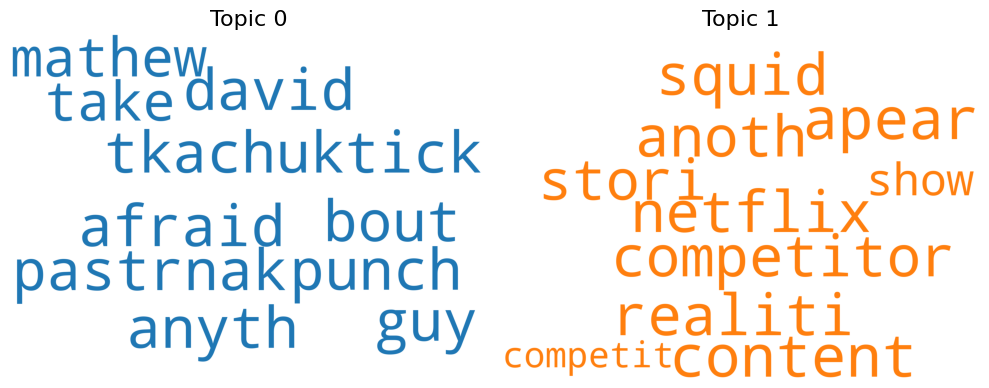

In [124]:
lsi_wordcloud(lsimodel)

In [125]:
#Function to calculate coherence for LSI model
def lsi_coherence(doc_term_matrix, lsimodel, dictionary, cleaned_documents):
    coherence_model_lsi = CoherenceModel(model=lsimodel, texts=cleaned_documents, dictionary=dictionary, coherence='c_v')
    coherence_lsi = coherence_model_lsi.get_coherence()
    print('\nCoherence Score: ', coherence_lsi)


In [126]:
lsi_coherence(doc_term_matrix, lsimodel, dictionary, cleaned_documents)


Coherence Score:  0.363137794981222


In [127]:
#Function to plot coherence score for LSI model
def lsi_plot(doc_term_matrix, lsimodel, dictionary, cleaned_documents):
    start_topics = 2
    end_topics = 8

    coherence_scores = []

    for num_topics in range(start_topics, end_topics + 1):
        lsimodel = LsiModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics)

        coherence_model_lsi = CoherenceModel(model=lsimodel, texts=cleaned_documents, dictionary=dictionary, coherence='c_v')
        coherence_lsi = coherence_model_lsi.get_coherence()
        coherence_scores.append(coherence_lsi)

    plt.figure(figsize=(7, 5))

    plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
    plt.title('Coherence Over Different Number of Topics (LSI)')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')

    plt.tight_layout()
    plt.show()


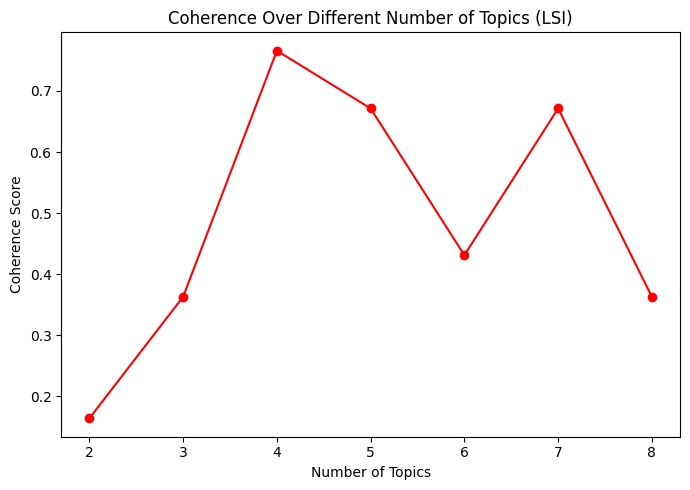

In [128]:
lsi_plot(doc_term_matrix, lsimodel, dictionary, cleaned_documents)

### LDA Model

In [129]:
#Function for LDA model
def lda_model(cleaned_documents):
  dictionary = corpora.Dictionary(cleaned_documents)
  doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_documents]

  ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=20,id2word=dictionary, random_state=20, passes=30)
  pprint(ldamodel.print_topics())

  return doc_term_matrix, ldamodel, dictionary

In [130]:
doc_term_matrix, ldamodel, dictionary = lda_model(cleaned_documents)

[(0,
  '0.014*"chanelsdespit" + 0.014*"buy" + 0.014*"face" + '
  '0.014*"creatorsmrbeast" + 0.014*"creatorl" + 0.014*"corpor" + '
  '0.014*"comonsmrbeast" + 0.014*"chanelthi" + 0.014*"imag" + 0.014*"valu"'),
 (1,
  '0.014*"chanelsdespit" + 0.014*"buy" + 0.014*"face" + '
  '0.014*"creatorsmrbeast" + 0.014*"creatorl" + 0.014*"corpor" + '
  '0.014*"comonsmrbeast" + 0.014*"chanelthi" + 0.014*"imag" + 0.014*"valu"'),
 (2,
  '0.014*"chanelsdespit" + 0.014*"buy" + 0.014*"face" + '
  '0.014*"creatorsmrbeast" + 0.014*"creatorl" + 0.014*"corpor" + '
  '0.014*"comonsmrbeast" + 0.014*"chanelthi" + 0.014*"imag" + 0.014*"valu"'),
 (3,
  '0.014*"chanelsdespit" + 0.014*"buy" + 0.014*"face" + '
  '0.014*"creatorsmrbeast" + 0.014*"creatorl" + 0.014*"corpor" + '
  '0.014*"comonsmrbeast" + 0.014*"chanelthi" + 0.014*"imag" + 0.014*"valu"'),
 (4,
  '0.055*"youtub" + 0.055*"tseri" + 0.055*"mrbeast" + 0.028*"content" + '
  '0.028*"creatorl" + 0.028*"stori" + 0.028*"chanelthi" + 0.028*"corpor" + '
  '0.028*"co

In [131]:
#Function to print the most dominant topic and its strength for each document
def lda_dominant_topics(ldamodel):
  for doc_id in range(len(doc_term_matrix)):
      print(f"Document {doc_id}:")
      doc_topics = ldamodel.get_document_topics(doc_term_matrix[doc_id])
      for topic, strength in doc_topics:
          print(f"Topic {topic}: Strength {strength}")
      print("\n")

In [132]:
lda_dominant_topics(ldamodel)

Document 0:
Topic 12: Strength 0.9136362671852112


Document 1:
Topic 12: Strength 0.9136362671852112


Document 2:
Topic 7: Strength 0.9749997854232788


Document 3:
Topic 12: Strength 0.9136362671852112


Document 4:
Topic 12: Strength 0.9136362671852112


Document 5:
Topic 12: Strength 0.9136362671852112


Document 6:
Topic 12: Strength 0.9136362671852112


Document 7:
Topic 4: Strength 0.9728569388389587




In [133]:
#Function to plot word cloud for dominant topics obtained from LDA model
def lda_wordcloud(ldamodel):
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

  cloud = WordCloud(stopwords=stopwords,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = ldamodel.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  fig.savefig('word_cloud.png')
  plt.show()

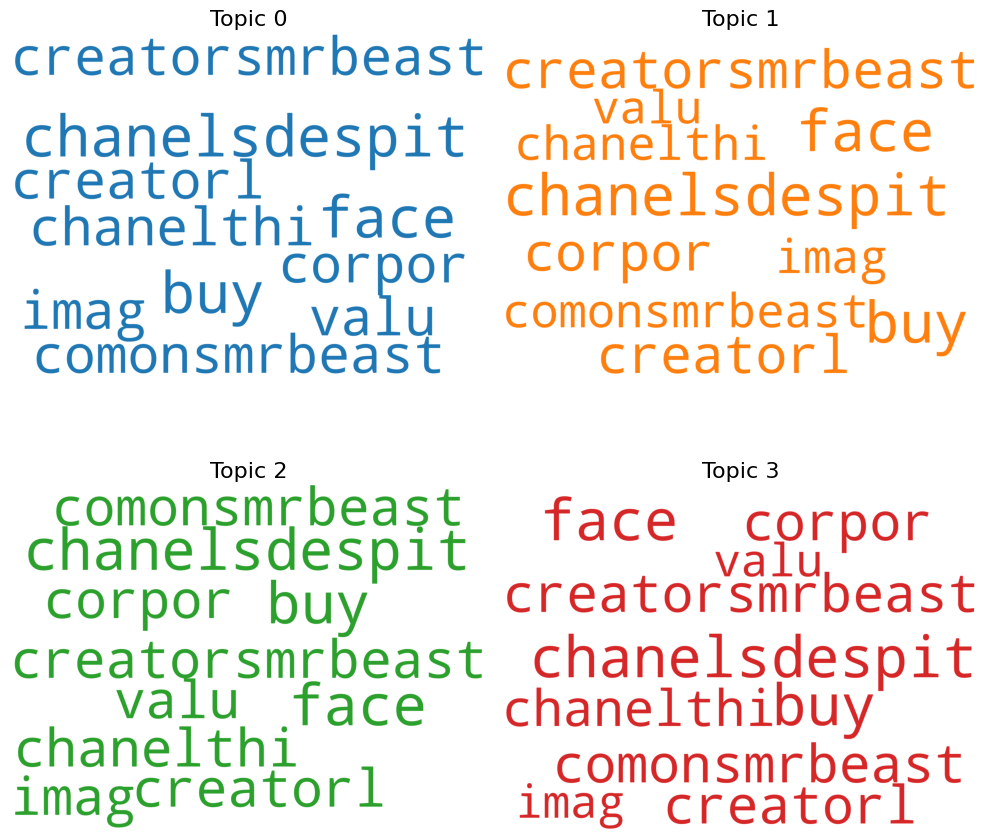

In [134]:
lda_wordcloud(ldamodel)

In [135]:
#Function to calculate coherence and perplexity for LDA model
def lda_perplexity_and_coherence(doc_term_matrix, ldamodel, dictionary):
  perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
  print('\nPerplexity: ', perplexity_lda)

  coherence_model_lda = CoherenceModel(model=ldamodel, texts=cleaned_documents, dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

In [136]:
lda_perplexity_and_coherence(doc_term_matrix, ldamodel, dictionary)


Perplexity:  -4.736854075020506

Coherence Score:  0.4069019789748084


In [137]:
#Function to plot coherence and perplexity for LDA model
def lda_plot(doc_term_matrix, ldamodel, dictionary):
  start_topics = 2
  end_topics = 8

  perplexity_scores = []
  coherence_scores = []

  for num_topics in range(start_topics, end_topics + 1):
      ldamodel = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, passes=15)

      perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
      perplexity_scores.append(perplexity_lda)

      coherence_model_lda = CoherenceModel(model=ldamodel, texts=cleaned_documents, dictionary=dictionary, coherence='c_v')
      coherence_lda = coherence_model_lda.get_coherence()
      coherence_scores.append(coherence_lda)

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.plot(range(start_topics, end_topics + 1), perplexity_scores, marker='o')
  plt.title('Perplexity Over Different Number of Topics')
  plt.xlabel('Number of Topics')
  plt.ylabel('Perplexity')

  plt.subplot(1, 2, 2)
  plt.plot(range(start_topics, end_topics + 1), coherence_scores, marker='o', color='r')
  plt.title('Coherence Over Different Number of Topics')
  plt.xlabel('Number of Topics')
  plt.ylabel('Coherence Score')

  plt.tight_layout()
  plt.show()

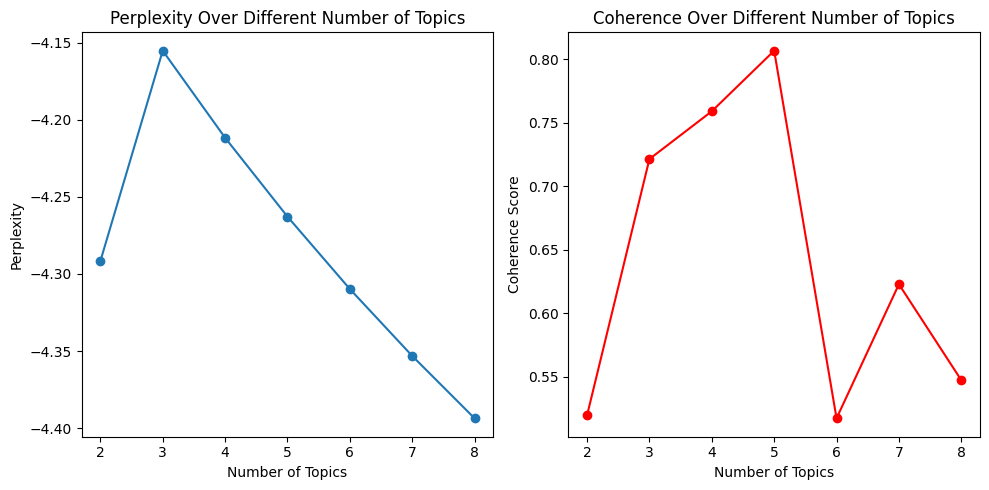

In [138]:
lda_plot(doc_term_matrix, ldamodel, dictionary)

## Summarization (Extraction-based)

In [139]:
#Function to retrieve text from the URL and locate paragraphs and text
def get_text(url):
    site = requests.get(url).text
    soup = BeautifulSoup(site, "html.parser")
    text =""
    for j in soup.find_all("p"):
        text += j.get_text()
    return text

In [140]:
#Function to generate word frequency distribution
def generate_word_frequency_distribution(text):
    stops = set(stopwords.words("english"))
    words = word_tokenize(text)
    freqTable = dict()

    for word in words:
        word = word.lower()
        if word not in stops:
            if word in freqTable:
                freqTable[word] += 1
            else:
                freqTable[word] = 1
    return freqTable

In [141]:
#Function to calculate sentence importance
def calculate_sentence_importance(text, freqTable):
    sents = sent_tokenize(text)
    sentScores = dict()

    for sent in sents:
        for word, freq in freqTable.items():
            if word in sent.lower():
                if sent in sentScores:
                    sentScores[sent] += freq
                else:
                    sentScores[sent] = freq
    return sentScores, sents

In [142]:
#Function to calculate average sentence importance
def calculate_average_sentence_importance(sentScores):
    sumValues = 0
    for sentence in sentScores:
        sumValues += sentScores[sentence]

    return (sumValues / len(sentScores))

In [143]:
#Function to perform extractive summarisation on sentences
def extractive_summarisation(sentences, sentScores, average):
    summary = ""
    for sent in sentences:
        if (sentScores[sent] > (1.5 * average)):
            summary += sent + " "
    return summary

In [144]:
url ="https://www.tanc.us/understanding-transmission/the-western-us-power-system/"

In [145]:
Text = get_text(url)

In [146]:
FreqTable = generate_word_frequency_distribution(Text)
FreqTable

{'u.s.': 1,
 'bulk': 1,
 'transmission': 7,
 'system': 5,
 'complex': 1,
 'network': 2,
 'independently': 1,
 'owned': 1,
 'operated': 2,
 'power': 8,
 'plants': 1,
 'lines': 1,
 '.': 7,
 'extra-high-voltage': 1,
 'connections': 1,
 'individual': 1,
 'utilities': 1,
 'permit': 1,
 'transfer': 1,
 'electrical': 1,
 'energy': 1,
 'one': 2,
 'part': 2,
 'another': 1,
 ',': 40,
 'also': 1,
 'referred': 1,
 'grid': 2,
 'evolved': 1,
 'three': 2,
 'large': 2,
 'interconnected': 2,
 'systems': 2,
 'move': 1,
 'electricity': 3,
 'around': 1,
 'country': 1,
 'networks': 1,
 ':': 4,
 'nerc': 3,
 '’': 5,
 'eight': 1,
 'regional': 3,
 'entities': 1,
 'cover': 1,
 '48': 1,
 'contiguous': 1,
 'states': 2,
 'portions': 2,
 'canada': 1,
 'mexico.the': 1,
 'western': 7,
 'interconnection': 3,
 'geographic': 1,
 'area': 6,
 'containing': 1,
 'synchronously': 1,
 'electric': 5,
 'north': 2,
 'america': 2,
 'includes': 1,
 'parts': 1,
 'montana': 1,
 'nebraska': 1,
 'new': 1,
 'mexico': 2,
 'south': 1,
 '

In [147]:
sentScores, Sentences = calculate_sentence_importance(Text, FreqTable)
print(sentScores, Sentences)

{'The U.S. bulk transmission system is a complex network of independently owned and operated power plants and transmission lines.': 45, 'Extra-high-voltage connections between individual utilities permit the transfer of electrical energy from one part of the network to another.': 29, 'This system, also referred to as the power grid, has evolved into three large interconnected systems that move electricity around the country.': 85, 'The three networks are:NERC’s eight regional entities cover the 48 contiguous States and portions of Canada and Mexico.The Western Interconnection is the geographic area containing the synchronously operated electric grid in the western part of North America, which includes parts of Montana, Nebraska, New Mexico, South Dakota, Texas, Wyoming and Mexico and all of Arizona, California, Colorado, Idaho, Nevada, Oregon, Utah, Washington and the Canadian provinces of British Columbia and Alberta.Formed in 2002 by the merger of the Western Systems Coordinating Cou

In [148]:
AverageImportance = calculate_average_sentence_importance(sentScores)
AverageImportance

143.375

In [149]:
Summary = extractive_summarisation(Sentences,sentScores, AverageImportance)
print(Summary)

Similarly, WECC’s mission today is to:Northwest Power Pool Area (NWPP)
Rocky Mountain Power Area (RMPA)
Arizona-New Mexico-Southern Nevada Power Area (AZ/NM/SNV)
California-Mexico Power Area (CA/MX)Data gathered from the four different Reporting Areas (or NERC Subregions as shown) allows WECC to carry out the mission and perform four organization roles:Due to the vastness and diverse characteristics of the region, WECC’s members are faced with unique and challenging problems in coordinating day-to-day interconnected system operation and the long-range planning needed to provide reliable and affordable electric service.Power Supply Adequacy – Consistent with the requirement to maintain operating reserves as defined by WECC and NERC operating policies, WECC conducts, on a seasonal basis, an assessment of generating reserve margins and transmission limitations between load and resource areas as well as probabilities of supplying expected load levels, accounting for uncertainties.A Balanci